# Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb



from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay



In [2]:
#load csv file
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
#get first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Information about the columns

gender
Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

age
Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

hypertension
Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

heart_disease
Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

smoking_history
Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

bmi
BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.


HbA1c_level
HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

blood_glucose_level
Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

diabetes
Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Converting categorical columns to numerical columns 

In [5]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [6]:
#dropping others as its count is very less 
df = df.drop(df[df['gender'] == 'Other'].index)


In [7]:
df['gender'].value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

In [8]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

In [9]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [10]:
df['smoking_history'] = df['smoking_history'].replace({'never':0,'No Info':1,'current':2,'former':3,'ever':4,'not current':5})

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


# Checking for null values

In [12]:
df.isna().mean()

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

# Checking for duplicate values

In [13]:
#find duplicate values 
df.duplicated().sum()

3854

In [14]:
#get total number of rows and columns in our data
df.shape

(99982, 9)

In [15]:
#drop duplicate values 
df.drop_duplicates(inplace=True)

In [16]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [17]:
df.shape

(96128, 9)

# Visualization

# Age Distribution

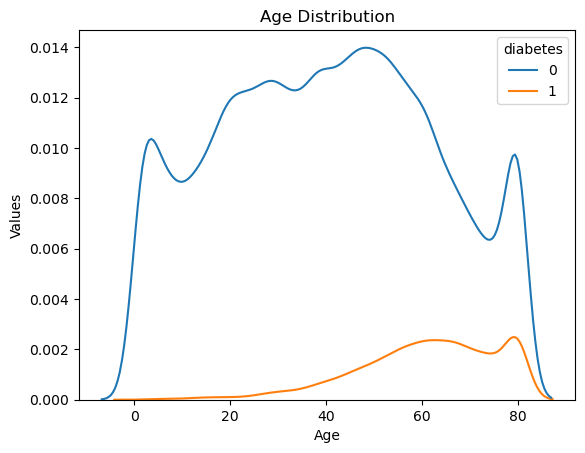

In [18]:
sns.kdeplot(data=df,x="age",hue='diabetes')
plt.title(f'Age Distribution') 
plt.xlabel("Age") 
plt.ylabel('Values')
plt.show()

# Gender Distribution

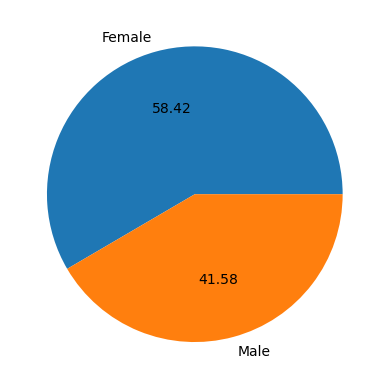

In [19]:
keys=['Female','Male']
plt.pie(df['gender'].value_counts(), labels=keys, autopct='%.2f') 
plt.show() 

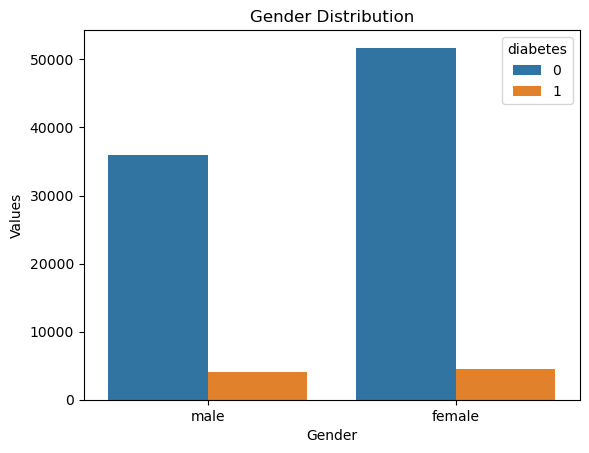

In [20]:
#distribution of gender based on target values 
genderPlot=sns.countplot(data=df,x="gender",hue='diabetes')
plt.title(f'Gender Distribution') 
plt.xlabel("Gender") 
plt.ylabel('Values')
genderPlot.set_xticklabels(['male', 'female']);
plt.show()


# Health Condition Distribution

In [21]:
df.sample()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
25261,0,18.0,0,0,0,38.43,4.5,80,0


In [22]:
df['smoking_history'].value_counts()

0    34395
1    32881
3     9299
2     9197
5     6359
4     3997
Name: smoking_history, dtype: int64

In [23]:
df_diabetes= df[df['diabetes']==1]
df_diabetes.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.0
mean,0.524287,60.925961,0.245933,0.149375,1.585593,31.997755,6.934827,194.026173,1.0
std,0.499439,14.545301,0.430664,0.356479,1.647670,7.563494,1.076462,58.630047,0.0
min,0.000000,3.000000,0.000000,0.000000,0.000000,10.980000,5.700000,126.000000,1.0
25%,0.000000,52.000000,0.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.0
50%,1.000000,62.000000,0.000000,0.000000,1.000000,29.985000,6.600000,160.000000,1.0
75%,1.000000,72.000000,0.000000,0.000000,3.000000,35.940000,7.500000,240.000000,1.0
max,1.000000,80.000000,1.000000,1.000000,5.000000,88.720000,9.000000,300.000000,1.0


In [24]:
df_no_diabetes= df[df['diabetes']==0]
df_no_diabetes.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,87646.000000,87646.000000,87646.000000,87646.000000,87646.000000,87646.000000,87646.000000,87646.000000,87646.0
mean,0.590033,39.945362,0.061326,0.030304,1.295051,26.868898,5.396934,132.817128,0.0
std,0.491830,22.228848,0.239929,0.171423,1.452627,6.509934,0.970804,34.241611,0.0
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.0
25%,0.000000,22.000000,0.000000,0.000000,0.000000,23.000000,4.800000,100.000000,0.0
50%,1.000000,40.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.0
75%,1.000000,57.000000,0.000000,0.000000,2.000000,29.170000,6.200000,158.000000,0.0
max,1.000000,80.000000,1.000000,1.000000,5.000000,95.690000,6.600000,200.000000,0.0


# Smoking History and Health Condition Distribution

Create categorical plots (e.g., bar plots or violin plots) to visualize the relationship between smoking history and the presence of hypertension, heart disease, or diabetes. This can help understand the impact of smoking on health conditions

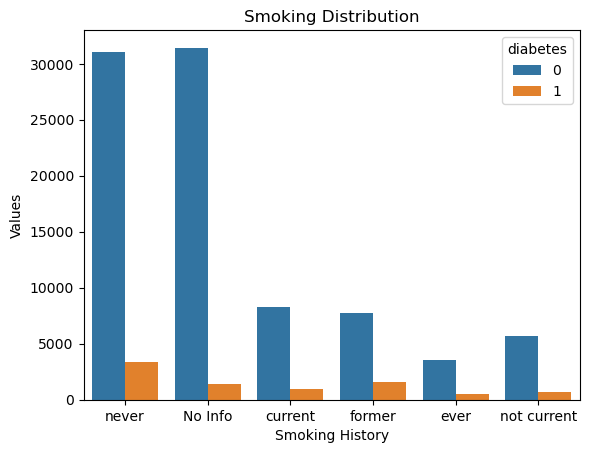

In [25]:
smokingPlot=sns.countplot(data=df,x="smoking_history",hue='diabetes')
plt.title(f'Smoking Distribution') 
plt.xlabel("Smoking History") 
plt.ylabel('Values')
#never':0,'No Info':1,'current':2,'former':3,'ever':4,'not current':5
smokingPlot.set_xticklabels(['never','No Info','current','former','ever','not current']);
plt.show()


# Blood Glucose Level Distribution

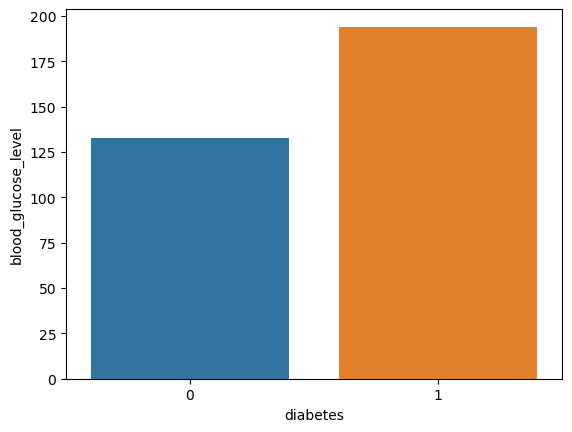

In [26]:
df_glucose= df.groupby('diabetes')[['blood_glucose_level']].mean()
sns.barplot(df_glucose,x=df_glucose.index,y='blood_glucose_level')
plt.show()

# Correlation Heatmap

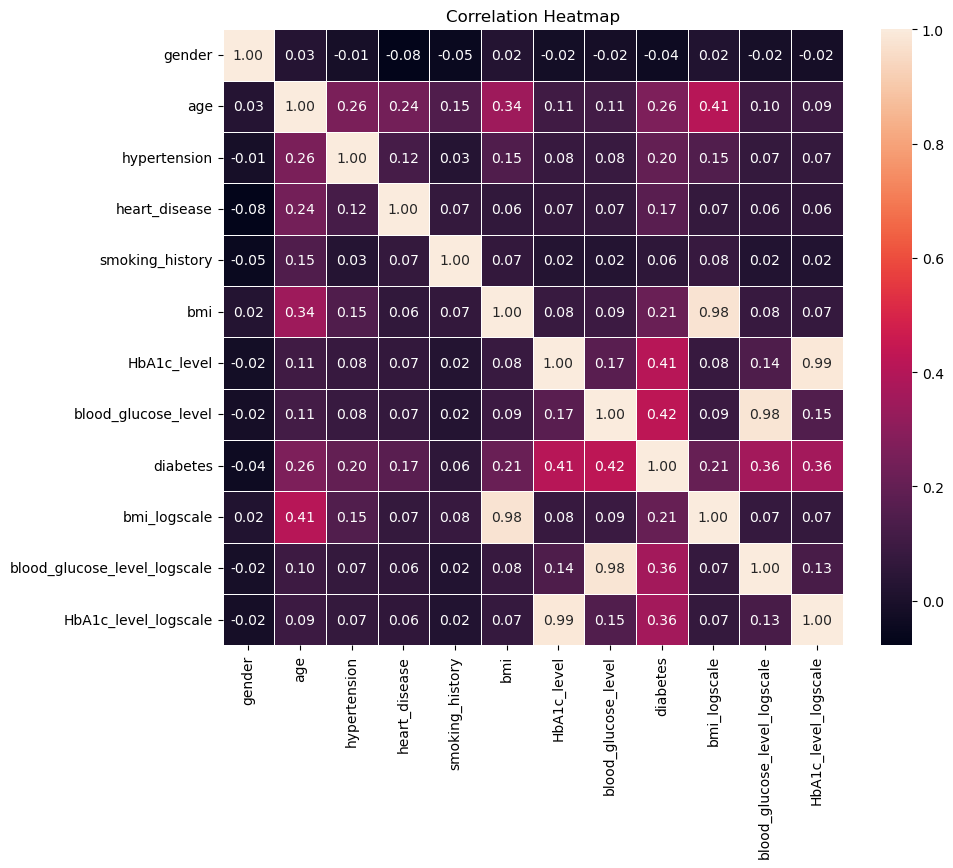

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# PairPlot

In [ ]:
sns.pairplot(df, hue="diabetes")

# Outlier Detection 

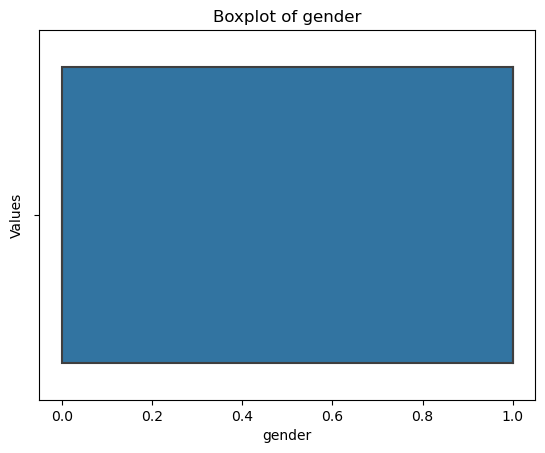

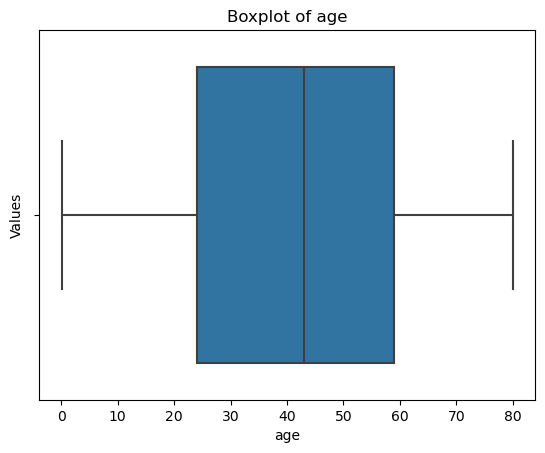

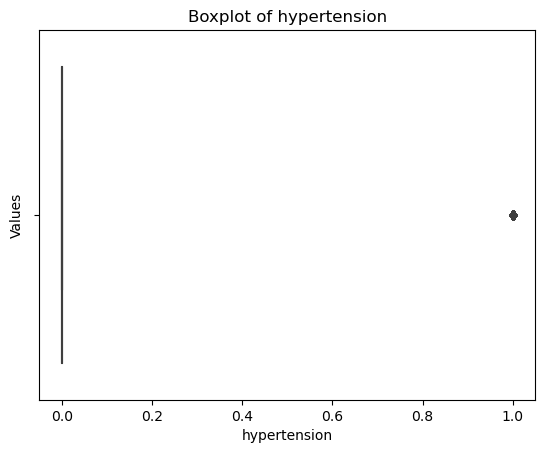

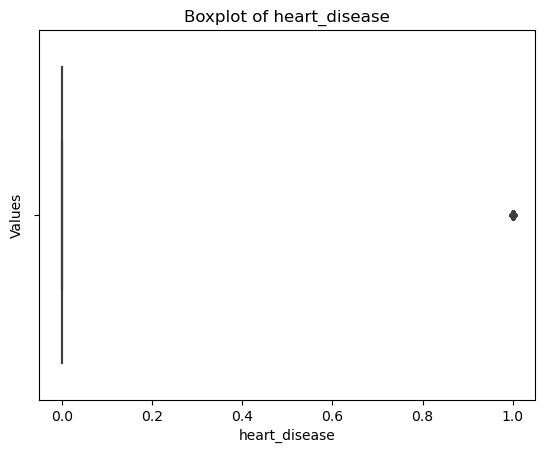

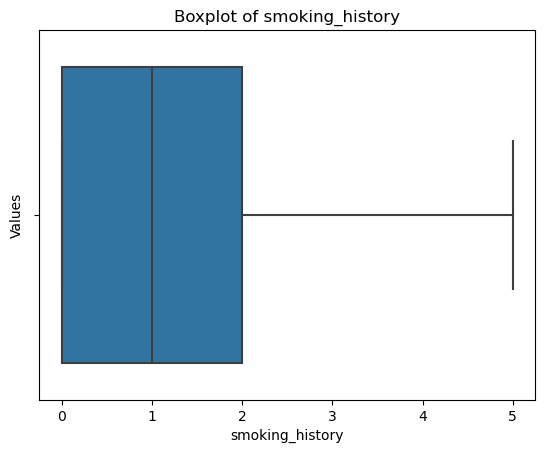

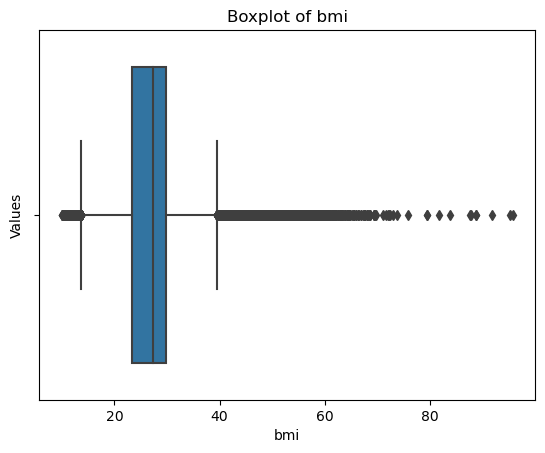

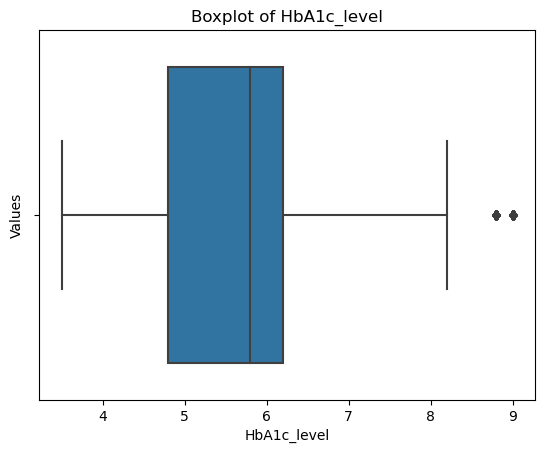

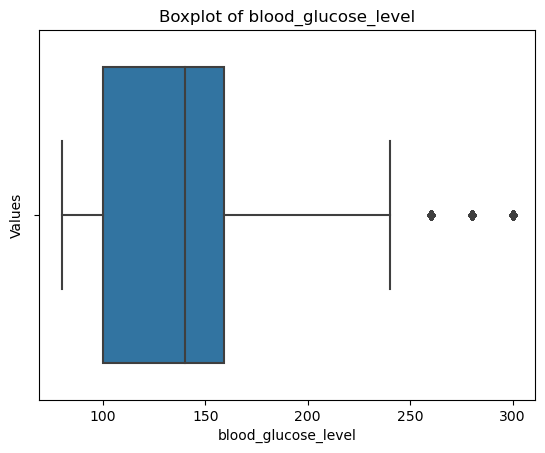

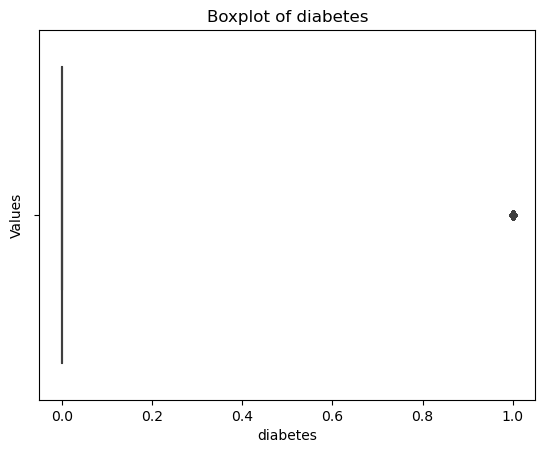

In [28]:
for i in df.columns:
    plt.figure()
    fig=sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}') 
    plt.xlabel(i) 
    plt.ylabel('Values')
    plt.show()


From the above boxplots we can see that , we have outliers only in 3 columns, bmi, blood glucose level and HbA1c_level. 

# Outliers removal using Log transformation


In [29]:
import numpy as np
def log_transformation(colname): 
    df[f'{colname}_logscale'] = df[colname].map(lambda x: np.log(x) if x > 0 else 0)

In [30]:
l_df = log_transformation('bmi')

In [31]:
l_df = log_transformation('blood_glucose_level')

In [32]:
l_df = log_transformation('HbA1c_level')

# Visualization after outlier removal

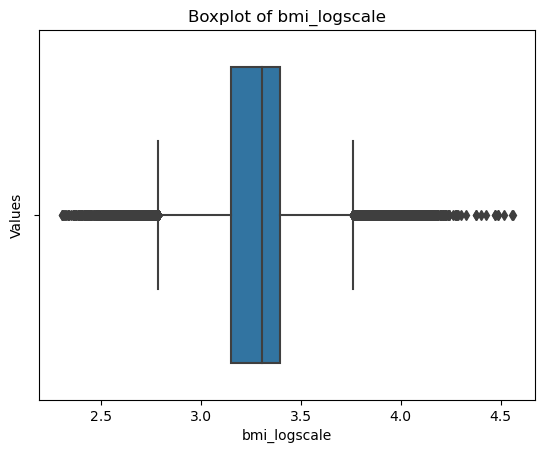

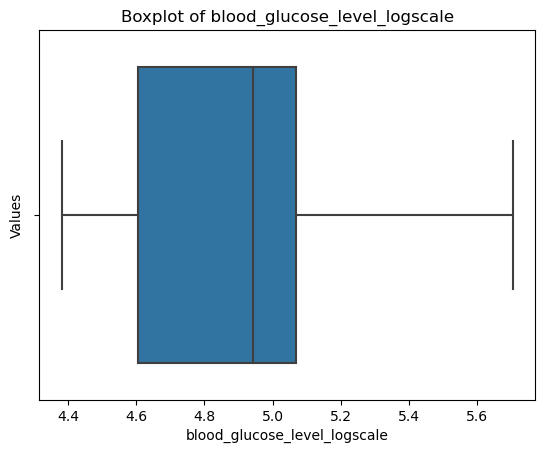

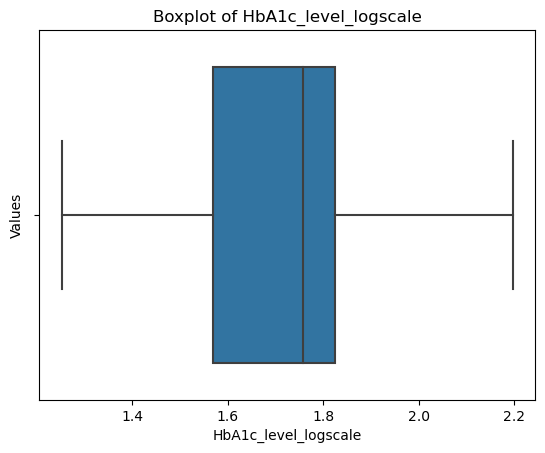

In [33]:
outlier_columns=['bmi_logscale','blood_glucose_level_logscale','HbA1c_level_logscale']
for i in outlier_columns:
    plt.figure()
    fig=sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}') 
    plt.xlabel(i) 
    plt.ylabel('Values')
    plt.show()


<Axes: xlabel='bmi', ylabel='Count'>

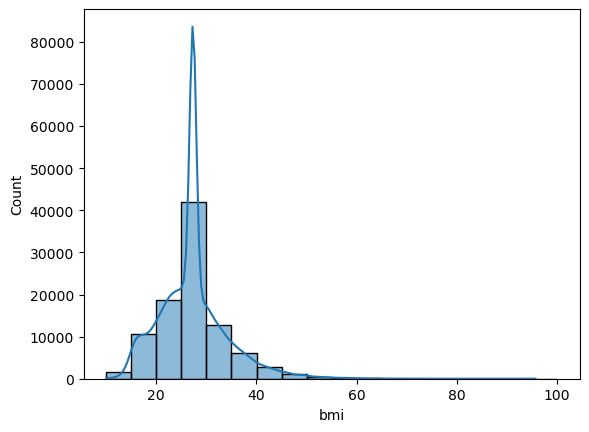

In [34]:
#histogram of bmi before log transformation
sns.histplot(x=df['bmi'],kde=True,binwidth=5) 

<Axes: xlabel='bmi_logscale', ylabel='Count'>

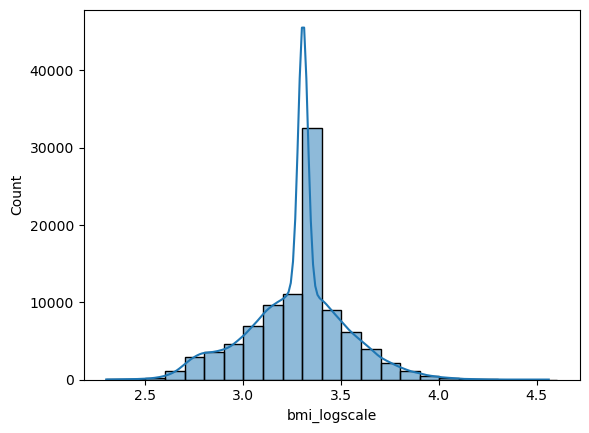

In [35]:
#histogram of bmi after log transformation
sns.histplot(x=df['bmi_logscale'],kde=True,binwidth=0.1)

In [36]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_logscale,blood_glucose_level_logscale,HbA1c_level_logscale
0,1,80.0,0,1,0,25.19,6.6,140,0,3.226447,4.941642,1.887070
1,1,54.0,0,0,1,27.32,6.6,80,0,3.307619,4.382027,1.887070
2,0,28.0,0,0,0,27.32,5.7,158,0,3.307619,5.062595,1.740466
3,1,36.0,0,0,2,23.45,5.0,155,0,3.154870,5.043425,1.609438
4,0,76.0,1,1,2,20.14,4.8,155,0,3.002708,5.043425,1.568616


# Class Imbalance

<Axes: >

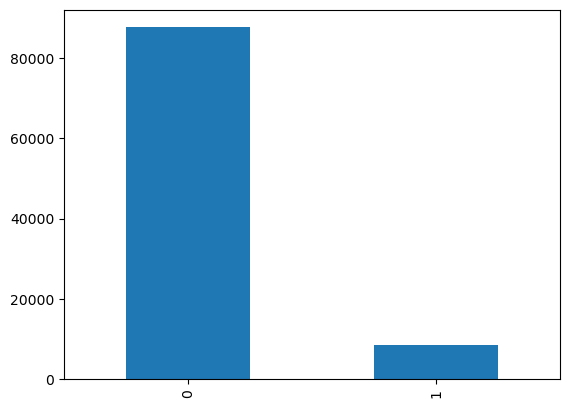

In [37]:
df['diabetes'].value_counts().plot(kind='bar')

# Splitting data into training and testing set

In [38]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [39]:
X.shape

(96128, 11)

In [40]:
y.shape

(96128,)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Performance Measure


In [42]:
def display_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(xticks_rotation='vertical',cmap=plt.cm.Blues)
    plt.show()

In [43]:
def roc_auc_plot(y_test,y_pred,model):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model}')
    plt.legend()
    plt.show()

In [44]:
def calculate_scores(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("accuracy for Training Set:", round(accuracy_score(y_train, pred_train)*100,2), "\b%")
    print("Classification Report for Training Set:\n\n", classification_report(y_train, pred_train))
    display_confusion_matrix(y_train, pred_train, model.classes_)
    #roc_curve(y_train,pred_train)
    print()
    print("accuracy for Test Set:", round(accuracy_score(y_test, pred_test)*100,2), "\b%")
    print("Classification Report for Test Set:\n\n", classification_report(y_test, pred_test))
    display_confusion_matrix(y_test, pred_test, model.classes_)
    roc_auc_plot(y_test,y_pred_proba,model)

# RandomForestClassifier

In [45]:
classifier= RandomForestClassifier()
rfc_model = classifier.fit(X_train, y_train)


accuracy for Training Set: 99.93 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70121
           1       1.00      0.99      1.00      6781

    accuracy                           1.00     76902
   macro avg       1.00      1.00      1.00     76902
weighted avg       1.00      1.00      1.00     76902



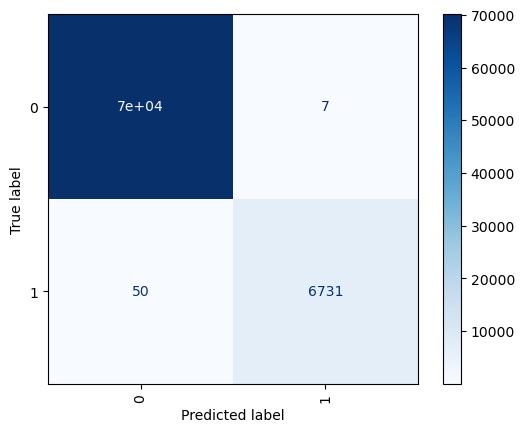


accuracy for Test Set: 96.61 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.93      0.67      0.78      1701

    accuracy                           0.97     19226
   macro avg       0.95      0.83      0.88     19226
weighted avg       0.97      0.97      0.96     19226



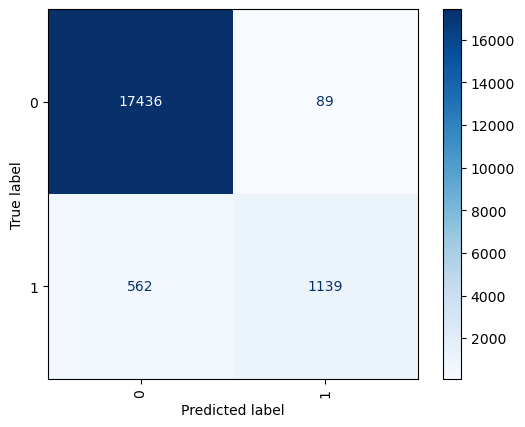

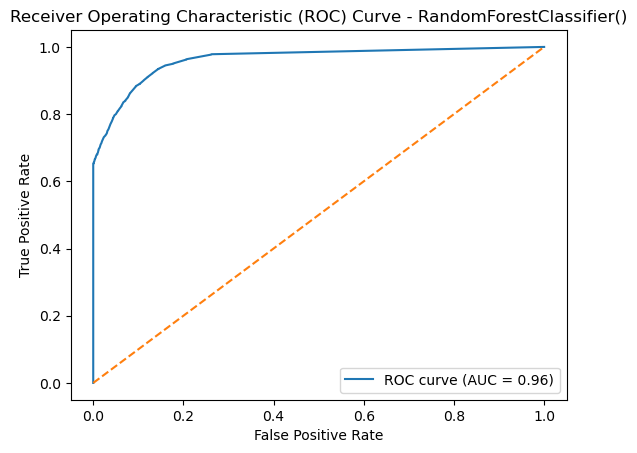

In [46]:
calculate_scores(rfc_model)

# Decision Tree 

accuracy for Training Set: 99.93 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70121
           1       1.00      0.99      1.00      6781

    accuracy                           1.00     76902
   macro avg       1.00      1.00      1.00     76902
weighted avg       1.00      1.00      1.00     76902



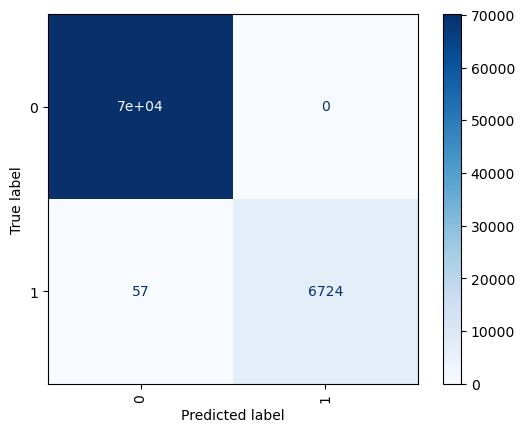


accuracy for Test Set: 94.86 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17525
           1       0.71      0.72      0.71      1701

    accuracy                           0.95     19226
   macro avg       0.84      0.84      0.84     19226
weighted avg       0.95      0.95      0.95     19226



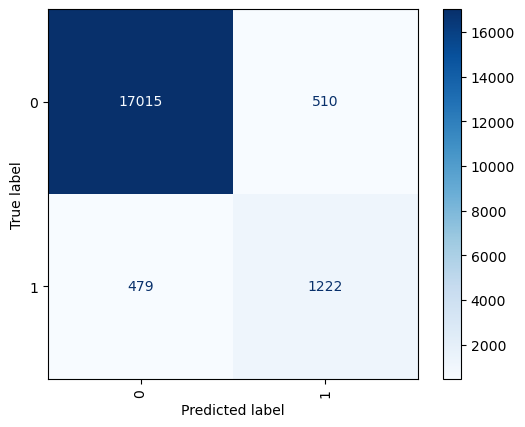

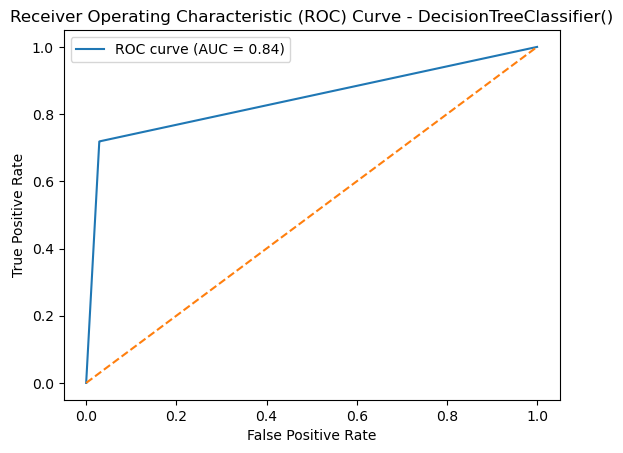

In [47]:
dt_classifier= DecisionTreeClassifier()
dt_model = dt_classifier.fit(X_train, y_train)
calculate_scores(dt_model)

# xgboost 


In [48]:
pip install xgboost

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


accuracy for Training Set: 97.57 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99     70121
           1       0.99      0.73      0.84      6781

    accuracy                           0.98     76902
   macro avg       0.98      0.87      0.91     76902
weighted avg       0.98      0.98      0.97     76902



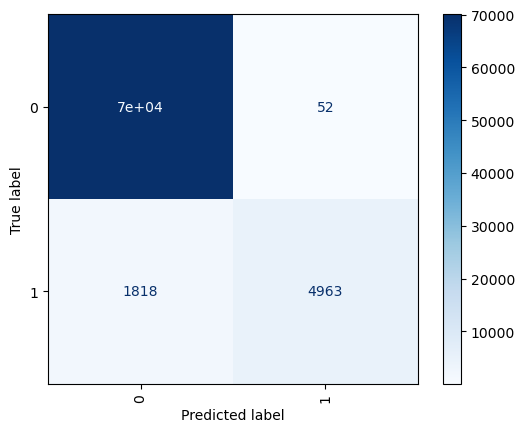


accuracy for Test Set: 96.81 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.95      0.67      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.96      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



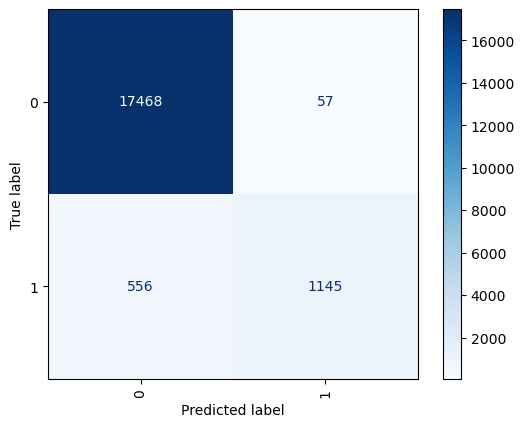

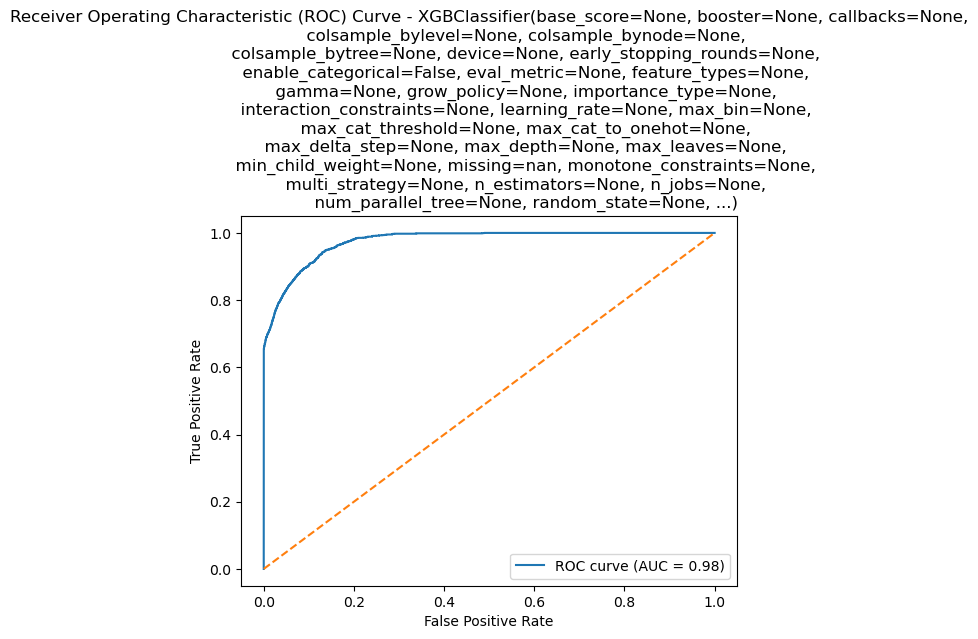

In [49]:
xgboost_classifier=xgb.XGBClassifier()
xgboost_model = xgboost_classifier.fit(X_train, y_train)
calculate_scores(xgboost_model)

# Gradient Boosting Classifier


accuracy for Training Set: 97.16 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98     70121
           1       0.99      0.69      0.81      6781

    accuracy                           0.97     76902
   macro avg       0.98      0.84      0.90     76902
weighted avg       0.97      0.97      0.97     76902



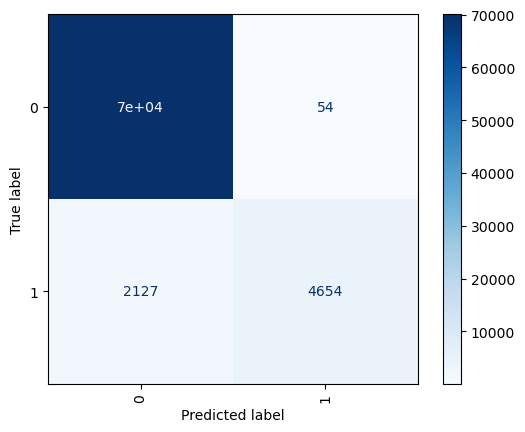


accuracy for Test Set: 96.95 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.99      0.66      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



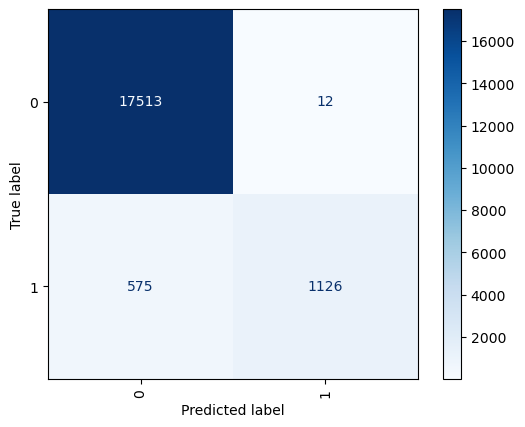

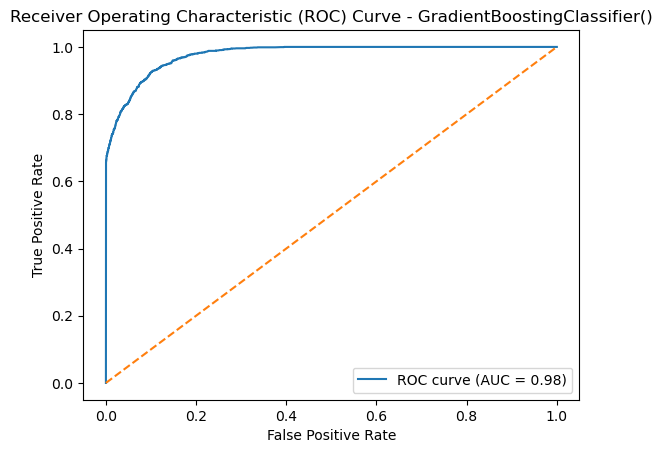

In [50]:
gb_classifier=GradientBoostingClassifier()
gb_model = gb_classifier.fit(X_train, y_train)
calculate_scores(gb_model)

